![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia e polinômios originais**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Analisando o método de Newton

## Questão 1: Implementação e testes simples

Implemente abaixo a função `newton_pts`, que executa o método de Newton,
retornando todos os pontos percorridos pelo algoritmo até atingir algum critério de parada.
Utilize como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    x_0, x_1 = x, x-f(x)/df(x)
    lista_aux = [x_0,x_1]
    contador = 0
    while abs(x_1 - x_0) >= xtol and abs(f(x_1)) >= ytol and contador <= maxiter:
        x_0, x_1 = x_1, x_1 - f(x_1)/df(x_1)
        lista_aux.append(x_1)
        contador += 1
    return lista_aux

In [3]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.isclose(zs[-1], 0)
assert 5 <= len(zs) <= 6

In [4]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.abs(zs[-2]-zs[-3]) >= 1e-8

In [5]:
def make_f(a):
    def f(x):
        return np.exp(x)-a
    return f
def df(x): return np.exp(x)

for a in range(2,11):
    f = make_f(a)
    zs = newton_pts(f,df,0,ytol=0)
    assert np.isclose(zs[-1], np.log(a))
    assert np.abs(zs[-1]-zs[-2]) <= 1e-8
    assert np.abs(zs[-2]-zs[-3]) >= 1e-8

## Questão 2: Uma equação trigonométrica

Vamos utilizar os nossos métodos para achar uma solução para uma equação difícil de resolver "na mão":

$$ \sin(x^2) = \cos(x)^2. $$

In [6]:
def f1(x): return np.sin(x**2)
def f2(x): return np.cos(x)**2

Faça um gráfico das funções $\sin(x^2)$ e $\cos(x)^2$ abaixo.

Com a ajuda do gráfico, defina um ponto inicial $x_0$
para o método de Newton encontrar a primeira raiz positiva da equação.

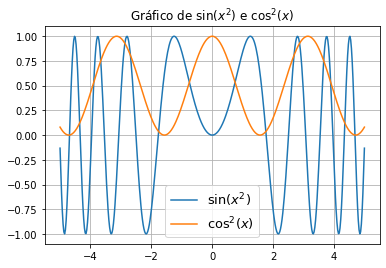

In [7]:
intervalo = np.linspace(-5,5,400)
plt.plot(intervalo, f1(intervalo), label = "$\sin(x^{2})$")
plt.plot(intervalo, f2(intervalo), label = "$\cos^{2}(x)$")
ax = plt.gca()
plt.grid()
plt.legend(prop = {"size":13})
plt.title("Gráfico de $\sin(x^{2})$ e $\cos^{2}(x)$");

In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Faça um gráfico mostrando a evolução do erro em $y$, em função do número de passos efetuados.

[0.5, 0.7887494393714181, 0.7510113974463231, 0.7509114390382318, 0.7509114376675099]


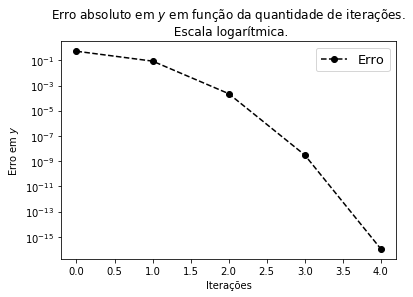

In [9]:
x_0 = 0.5
def composta(f1,f2):
    def diferença(x):
        return f1(x)-f2(x)
    return diferença
pts = newton_pts(composta(f1,f2), lambda x : 2*x*np.cos(x**2) + 2*np.sin(x)*np.cos(x), x_0, ytol = 1e-16)
plt.semilogy(np.arange(len(pts)), abs(composta(f1,f2)(np.array(pts))),"o--", color = "black", label = "Erro")
print(pts)
ax = plt.gca();
plt.title("Erro absoluto em $y$ em função da quantidade de iterações.\n Escala logarítmica.")
plt.xlabel("Iterações")
plt.ylabel("Erro em $y$")
plt.legend(prop = {"size":13});

In [10]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente o resultado.

In [11]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    assert f(a)*f(b)<0, "O intervalo foi mal escolhido"
    niters = 0
    lista_aux = []
    meio = (a+b)/2
    while abs(b-a)>=xtol and abs(f(meio))>=ytol and niters <= maxiter:
        meio = (a+b)/2
        if f(a)*f(meio)<0:
            b = meio
            lista_aux.append(b)
        else:
            a = meio
            lista_aux.append(a)
        niters+=1
    return lista_aux

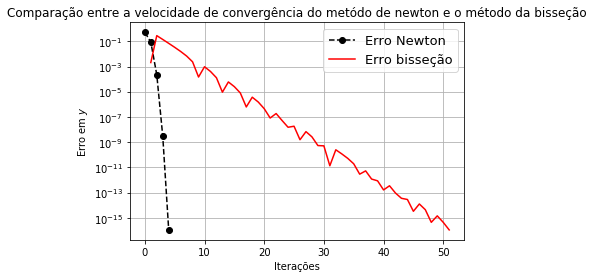

In [12]:
pts_sin = np.array(bissecao_pts(composta(f1,f2), 0.5, 1,xtol = 0, ytol = 0, maxiter = 50))
plt.semilogy(np.arange(len(pts)), np.abs(composta(f1,f2)(np.array(pts))),"o--", color = "black", label = "Erro Newton")
plt.semilogy(np.arange(1,len(pts_sin)+1), np.abs(composta(f1,f2)(pts_sin)), color = "red",  label ="Erro bisseção" )
plt.grid()
plt.xlabel("Iterações")
plt.ylabel("Erro em $y$")
plt.legend(prop = {"size":13})
plt.title("Comparação entre a velocidade de convergência do metódo de newton e o método da bisseção");

Podemos notar que, para um intervalo similar, o método de Newton é extremamente mais rápido que o método da bisseção aplicado na mesma função.

Você acha que seria uma boa ideia fazer um gráfico do erro em $x$ nesse caso?
Porquê?

Não. Vamos analisar a fórmula $x = x_{0} - \frac{f(x_{0})}{f'(x_{0})}$, nela podemos perceber que:
$|x-x_{0}| = |\frac{f(x_{0})}{f'(x_{0})}|$. Como podemos ver pelo gráfico acima, $f(x_{0})$ converge rapidamente para 0, o que torna o gráfico quase vertical mesmo na escala logarítima. Entretanto, o erro em $x$ ainda divide $f(x_{0})$ por $f'(x_{0})$, tornando a convergência do erro em $x$ extremamente rápida para ser visualizada até em escalas logarítmicas. O que faz com que gráficos do erro de $x$ nesse caso só mostrariam uma convergência rápida para o absoluto 0 nas abcissas.

## Questão 3: Polinômios em `Python`

Para não precisar ficar implementando polinômio por polinômio,
implemente uma função `cria_poli(coefs)` que retorna uma (outra) função `poli(x)`,
que computa o valor do polinômio

$p(X)=$ `coefs[0]`  $+$ `coefs[1]` $X+$ `coefs[2]` $X^2+\dots+$ `coefs[-1]` $X^n$

em $X=$`x`.
As funções de polinômios do `numpy` (`poly1d`, `polyval`, `polyder`) podem lhe ser úteis :-)

No mesmo espírito, crie a função `cria_derivada_poli(coefs)`,
que retorna uma função `derivada_poli(x)` que computa a derivada do polinômio acima em $X=$`x`. 

In [13]:
def cria_poli(l):
    """A função recebe uma list <l>
    Função que a partir de uma lista <l> de coeficientes, com <l[0]> sendo o coeficiente de menor grau, 
    cria uma função que computa o polinômio gerado por essa lista.
    A função retorna uma <function>"""
    def valor_poli(x):
        return np.polyval(l[::-1], x)
    return valor_poli

def cria_derivada_poli(l,m=1):
    """A função recebe uma list <l> e um int <m> que tem valor padrão 1
    Função que a partir de uma lista <l> de coeficientes, com <l[0]> sendo o coeficiente de menor grau, 
    cria uma função que computa a derivada de ordem <m> do polinômio gerado por essa lista.
    A função retorna uma <function>"""
    def valor_poli(x):
        return np.polyval(np.polyder(np.poly1d(l[::-1]), m),x)
    return valor_poli

In [14]:
p = cria_poli([1,2,3,4,5,6,7,8])
assert p(0) == 1
assert p(1) == 8*9/2

In [15]:
for n in range(2,11):
    dp = cria_derivada_poli(np.linspace(0,n,n+1))
    assert dp(1) == np.sum([c**2 for c in range(n+1)])

In [16]:
np.random.seed(21)
for n in range(2,6):
    coefs = np.random.rand(n)*100
    x = np.random.rand()*10
    p = cria_poli(coefs)
    dp = cria_derivada_poli(coefs)
    assert np.isclose(p(x+0.002), p(x)+0.002*dp(x))

## Questão 4: Achando as raízes de um polinômio

Defina o polinômio
$p(x) = 1 - \frac{1}{2}x - 4x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5$,
e faça um gráfico que permita visualizar satisfatoriamente a região onde se encontram as suas raízes.

Deduza um intervalo $[a,b]$ que contenha todas as raízes reais de $p(x)$.

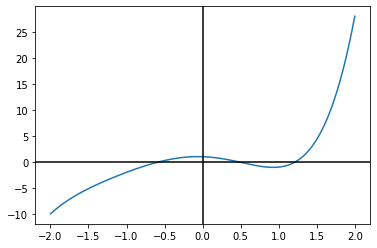

In [17]:
p = [1,-1/2,-4,1/2,3/2,1/2]
intervalo = np.linspace(-2, 2,400)
plt.plot(intervalo, cria_poli(p)(intervalo))
plt.axhline(color = "black")
plt.axvline(color = "black");

Divida o intervalo $[a,b]$ em um número bem grande de pontos.

Faça um gráfico demonstrando o número de iterações necessárias para que o método de Newton convirja,
tendo cada ponto do intervalo como valor inicial.

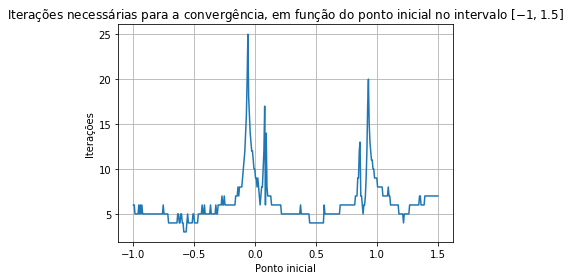

In [18]:
intervalo = np.linspace(-1,1.5,400)
valores_iters = [len(newton_pts(cria_poli(p),cria_derivada_poli(p),c,xtol = 1e-16, ytol = 1e-16)) - 1 for c in intervalo]
plt.plot(intervalo, valores_iters);
plt.grid()
ax = plt.gca()
plt.title("Iterações necessárias para a convergência, em função do ponto inicial no intervalo $[-1,1.5]$");
plt.xlabel("Ponto inicial")
plt.ylabel("Iterações");

In [19]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, faça o gráfico das raizes para as quais o método converge,
em função do ponto inicial.

[-0.5756667263359393, -0.5756667263359393, 1.2177657559331232, 0.475637970684145]


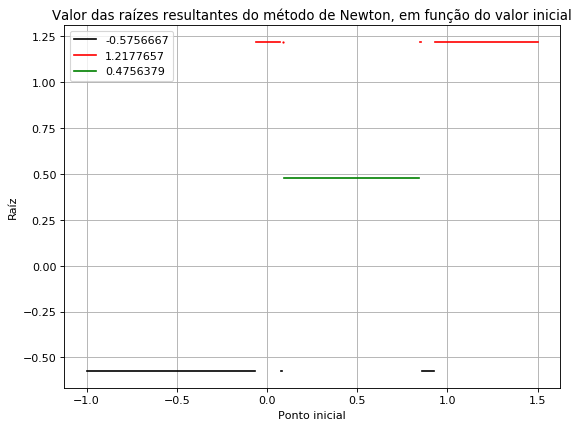

In [20]:
valores_raizes = [newton_pts(cria_poli(p),cria_derivada_poli(p),c, xtol = 1e-16, ytol = 1e-16)[-1] for c in intervalo]
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(intervalo[:150], valores_raizes[:150], color = "black", label = "-0.5756667");
plt.plot(intervalo[150:172], valores_raizes[150:172], color = "red", label = "1.2177657")
plt.plot(intervalo[172:174], valores_raizes[172:174], color = "black")
plt.scatter(intervalo[174], valores_raizes[174], s = 1, color = "red")
plt.plot(intervalo[175:295], valores_raizes[175:295], color = "green", label = "0.4756379")
plt.plot(intervalo[295:297], valores_raizes[295:297], color = "red")
plt.plot(intervalo[297:308],valores_raizes[297:308], color = "black")
plt.plot(intervalo[308:],valores_raizes[308:], color = "red")
plt.grid()
plt.title("Valor das raízes resultantes do método de Newton, em função do valor inicial")
plt.xlabel("Ponto inicial")
plt.ylabel("Raíz")
plt.legend(prop = {"size":10}, loc = "best");
print(valores_raizes[172:176])

Comente os gráficos.

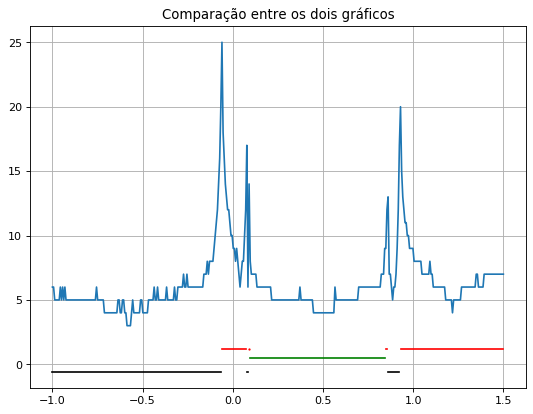

In [21]:
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(intervalo[:150], valores_raizes[:150], color = "black", label = "-0.5756667");
plt.plot(intervalo[150:172], valores_raizes[150:172], color = "red", label = "1.2177657")
plt.plot(intervalo[172:174], valores_raizes[172:174], color = "black")
plt.scatter(intervalo[174], valores_raizes[174], s = 1, color = "red")
plt.plot(intervalo[175:295], valores_raizes[175:295], color = "green", label = "0.4756379")
plt.plot(intervalo[295:297], valores_raizes[295:297], color = "red")
plt.plot(intervalo[297:308],valores_raizes[297:308], color = "black")
plt.plot(intervalo[308:],valores_raizes[308:], color = "red")
plt.plot(intervalo, valores_iters)
plt.grid()
plt.title("Comparação entre os dois gráficos");

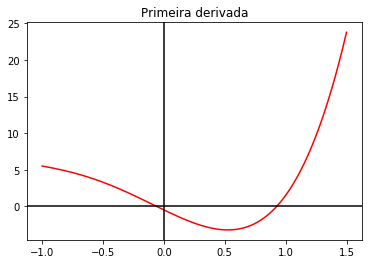

In [22]:
plt.plot(intervalo, cria_derivada_poli(p)(intervalo), color = "red")
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.title("Primeira derivada");

Podemos observar dois tipos de picos no gráfico azul. Os picos mais altos ocorrem quando o valor inicial do método de Newton é suficientemente próximo dos pontos em que a derivada é 0. Nesse caso, o valor $x$ em $x = x_{0} - \frac{f(x_{0})}{f'(x_{0})}$ vai parar extremamente longe do ponto $x_{0}$, pois a derivada nesse ponto (que está no denominador) se aproxima bastante de 0, o que vai fazer o processo do algoritmo demorar mais para encontrar algum valor que seja uma raiz.  Os picos menores ocorrem próximos aos mais altos, numa área de instabilidade. Observando o gráfico acima, podemos ver que os picos menores ocorrem quando há mudança entre as cores vermelha e preta, que representam a raiz mais à esquerda e a raiz mais à direita do polinômio. Isso significa que por algum motivo (talvez por estarem próximos do zero da derivada), alguns pontos intermediários do processo do método de Newton estão indo parar ou na extrema esquerda ou na extrema direita do gráfico em um intervalo extremamente pequeno, o que causa a instabilidade. É possível notar que logo depois de passar pelo ponto $x = 0$, há duas mudanças entre o preto e o vermelho em um intervalo estreito, nesse exato momento é possível notar dois picos no gráfico azul, que são tão próximos a ponto de borrar um pouco a imagem. 

## Questão 5: Outro polinômio
Repita o mesmo estudo para o polinômio

$$p(x) = 1 - \frac{1}{2}x - \frac{3}{2}x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5. $$

Gráfico

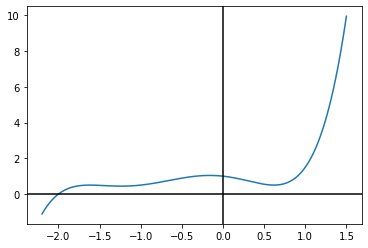

In [23]:
q = [1,-1/2,-3/2,1/2,3/2,1/2]
intervalo = np.linspace(-2.2, 1.5,400)
plt.plot(intervalo, cria_poli(q)(intervalo))
plt.axhline(color = "black")
plt.axvline(color = "black");

Iterações para encontrar as raízes, e raízes encontradas.

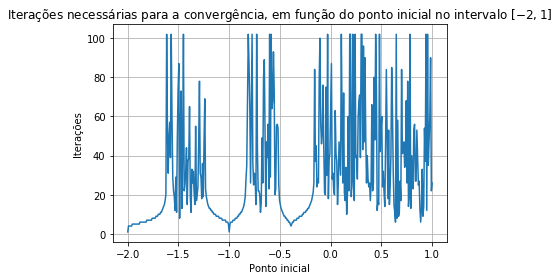

In [24]:
intervalo = np.linspace(-2,1,400)
valores_iters = [len(newton_pts(cria_poli(q),cria_derivada_poli(q),c, ytol = 1e-16)) - 1 for c in intervalo]
plt.plot(intervalo, valores_iters);
plt.grid()
ax = plt.gca()
plt.title("Iterações necessárias para a convergência, em função do ponto inicial no intervalo $[-2,1]$");
plt.xlabel("Ponto inicial")
plt.ylabel("Iterações");

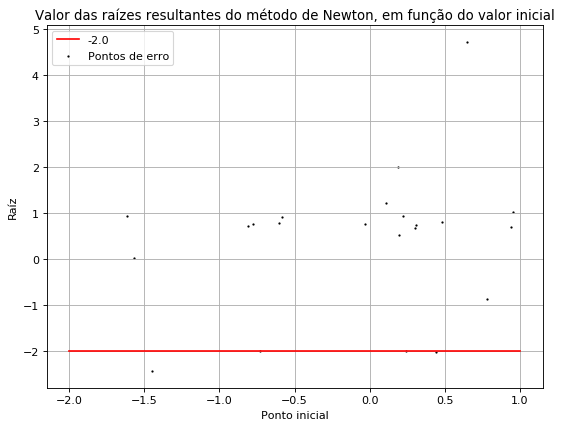

In [25]:
valores_raizes = [newton_pts(cria_poli(q),cria_derivada_poli(q),c, xtol = 1e-16, ytol = 1e-16)[-1] for c in intervalo]
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(intervalo, [-2.0]*(len(intervalo)), color = "red", label = "-2.0")
plt.scatter(intervalo[51], valores_raizes[51], s = 1, color = "black", label = "Pontos de erro")
plt.scatter(intervalo[57], valores_raizes[57], s = 1, color = "black")
plt.scatter(intervalo[73], valores_raizes[73], s = 1, color = "black")
plt.scatter(intervalo[158], valores_raizes[158], s = 1, color = "black")
plt.scatter(intervalo[163], valores_raizes[163], s = 1, color = "black")
plt.scatter(intervalo[169], valores_raizes[169], s = 1, color = "black")
plt.scatter(intervalo[186], valores_raizes[186], s = 1, color = "black")
plt.scatter(intervalo[188], valores_raizes[188], s = 1, color = "black")
plt.scatter(intervalo[262], valores_raizes[262], s = 1, color = "black")
plt.scatter(intervalo[280], valores_raizes[280], s = 1, color = "black")
plt.scatter(intervalo[291], valores_raizes[291], s = 1, color = "black")
plt.scatter(intervalo[292], valores_raizes[292], s = 1, color = "black")
plt.scatter(intervalo[295], valores_raizes[295], s = 1, color = "black")
plt.scatter(intervalo[298], valores_raizes[298], s = 1, color = "black")
plt.scatter(intervalo[306], valores_raizes[306], s = 1, color = "black")
plt.scatter(intervalo[307], valores_raizes[307], s = 1, color = "black")
plt.scatter(intervalo[325], valores_raizes[325], s = 1, color = "black")
plt.scatter(intervalo[330], valores_raizes[330], s = 1, color = "black")
plt.scatter(intervalo[352], valores_raizes[352], s = 1, color = "black")
plt.scatter(intervalo[370], valores_raizes[370], s = 1, color = "black")
plt.scatter(intervalo[391], valores_raizes[391], s = 1, color = "black")
plt.scatter(intervalo[393], valores_raizes[393], s = 1, color = "black")
plt.grid()
plt.title("Valor das raízes resultantes do método de Newton, em função do valor inicial")
plt.xlabel("Ponto inicial")
plt.ylabel("Raíz")
plt.legend(prop = {"size":10}, loc = "best");

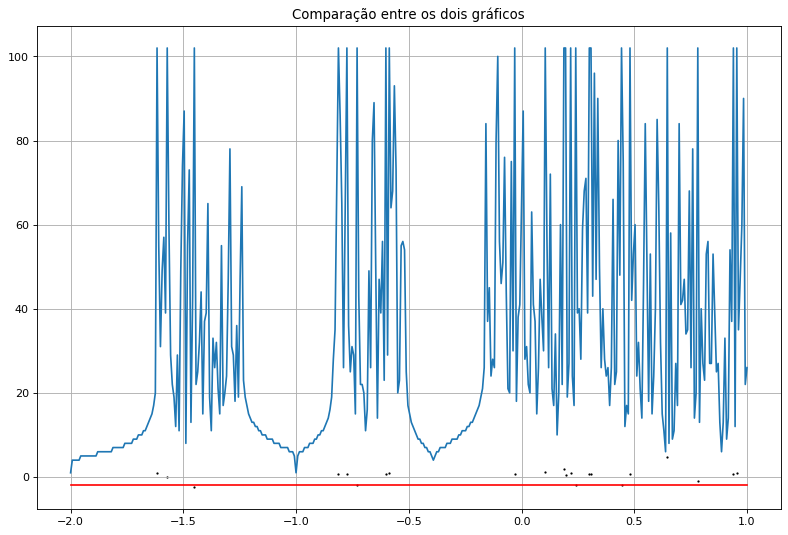

In [26]:
plt.figure(figsize = (12,8), dpi = 80)
plt.plot(intervalo, [-2.0]*(len(intervalo)), color = "red", label = "-2.0")
plt.scatter(intervalo[51], valores_raizes[51], s = 1, color = "black", label = "Pontos de erro")
plt.scatter(intervalo[57], valores_raizes[57], s = 1, color = "black")
plt.scatter(intervalo[73], valores_raizes[73], s = 1, color = "black")
plt.scatter(intervalo[158], valores_raizes[158], s = 1, color = "black")
plt.scatter(intervalo[163], valores_raizes[163], s = 1, color = "black")
plt.scatter(intervalo[169], valores_raizes[169], s = 1, color = "black")
plt.scatter(intervalo[186], valores_raizes[186], s = 1, color = "black")
plt.scatter(intervalo[188], valores_raizes[188], s = 1, color = "black")
plt.scatter(intervalo[262], valores_raizes[262], s = 1, color = "black")
plt.scatter(intervalo[280], valores_raizes[280], s = 1, color = "black")
plt.scatter(intervalo[291], valores_raizes[291], s = 1, color = "black")
plt.scatter(intervalo[292], valores_raizes[292], s = 1, color = "black")
plt.scatter(intervalo[295], valores_raizes[295], s = 1, color = "black")
plt.scatter(intervalo[298], valores_raizes[298], s = 1, color = "black")
plt.scatter(intervalo[306], valores_raizes[306], s = 1, color = "black")
plt.scatter(intervalo[307], valores_raizes[307], s = 1, color = "black")
plt.scatter(intervalo[325], valores_raizes[325], s = 1, color = "black")
plt.scatter(intervalo[330], valores_raizes[330], s = 1, color = "black")
plt.scatter(intervalo[352], valores_raizes[352], s = 1, color = "black")
plt.scatter(intervalo[370], valores_raizes[370], s = 1, color = "black")
plt.scatter(intervalo[391], valores_raizes[391], s = 1, color = "black")
plt.scatter(intervalo[393], valores_raizes[393], s = 1, color = "black")
plt.plot(intervalo, valores_iters)
plt.grid()
plt.title("Comparação entre os dois gráficos");

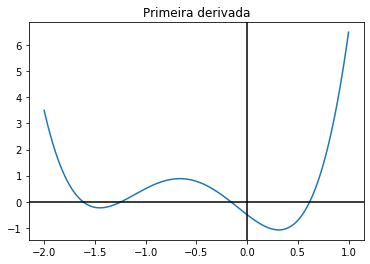

In [27]:
plt.plot(intervalo, cria_derivada_poli(q)(intervalo))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.title("Primeira derivada");

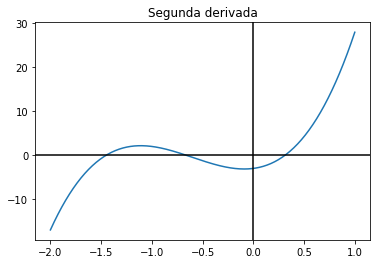

In [28]:
plt.plot(intervalo, cria_derivada_poli(q,2)(intervalo))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.title("Segunda derivada");

O que mudou dessa vez? Que conclusão você tira disso?

Pode-se perceber que o gráfico se tornou bem caótico. O excesso de picos se deve ao fato de que a derivada do polinômio tem 4 raízes, além de ter segunda derivada variando entre $2$ e $-3$ no intervalo $[-1.5,0.5]$, o que faz com que as retas tangentes ao gráfico perto dos pontos de derivada 0 não consigam deixar de ser tão horizontais tão rapidamente, fazendo com que alguns valores do processo de Newton parem bem longe da raiz $-2$. Também é perceptível que os pontos pretos estão logo abaixo dos picos de 100 iterações no gráfico azul, pois eles representam o último valor adquirido pelo processo de Newton antes de atingirem o critério de parada das iterações. O que podemos tirar deste gráfico é uma suspeita de que os picos pequenos na figura anterior podem ter a ver com a sua segunda derivada, pois ela interfere na "horizontalidade" do segundo gráfico.